# plotting

> Functions to plot mutation results

In [ ]:
#| hide
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#| default_exp plotting

In [ ]:
#| hide
from nbdev.showdoc import *


In [ ]:
#| export
from fastcore.basics import *
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv
import numpy as np
from Bio import SeqIO
from typing import Union

In [ ]:
#| hide
from dgrec.example_data import get_example_data_dir

In [ ]:
#| hide
data_path=get_example_data_dir()
os.listdir(data_path)

['sacB_genotypes.csv',
 'sacB_ref.fasta',
 '__pycache__',
 'sacB_example.fastq.gz',
 '__init__.py']

In [ ]:
read_ref_file="sacB_ref.fasta"
ref=next(SeqIO.parse(os.path.join(data_path,read_ref_file),"fasta"))
ref_seq=str(ref.seq)

gen_list=[]
with open(os.path.join(data_path,"sacB_genotypes.csv"),"r") as handle: 
    reader = csv.reader(handle, delimiter='\t')
    for row in reader:
        gen_list.append((row[0],int(row[1])))

In [ ]:
#| export
def plot_mutations(gen_list: list, #list of genotypes. Each genotype is a tuple: (string representation of the genotype, number of molecules)
                   ref_seq: str, #reference sequence
                   sample_name: str = None,  #sample name
                   plot_range: Union[tuple,list] = None,  #limits the plot to the specified range
                   TR_range: Union[tuple,list] = None, #when specified creates a shaded box highlighting the position of the TR
                   ):
    
    if not plot_range:
        plot_range=[0,len(ref_seq)]

    L=plot_range[1]-plot_range[0]
    ref_seq=ref_seq[plot_range[0]:plot_range[1]]

    symbols=["A","T","G","C","del","ins","N"]
    mut_arrays=dict([(s,np.zeros(L)) for s in symbols])
    for gen, n in gen_list[1:]:
        g=gen.split(',')
        for mut in g:
            if mut:
                mut_from=mut[0]
                ix=int(mut[1:-1])
                k=mut[-1]
                if k=="-":
                    k="del"
                elif mut[0]=="-":
                    k="ins"
                mut_arrays[k][ix]+=n  


    for k in mut_arrays:
        mut_arrays[k]=mut_arrays[k][plot_range[0]:plot_range[1]]



    labels=np.array(range(L))

    fig, ax = plt.subplots(1,1,figsize=(20, 5))

    y=sum(mut_arrays.values())
    colors=["orange","red","green","blue","grey","black"]
    for i,s in enumerate(symbols[:-1]):
        sns.barplot(x=labels,y=y,color=colors[i],ax=ax,label=s)
        y-=mut_arrays[s]

    ax.set_xticks(range(len(ref_seq)))
    ax.set_xticklabels(list(ref_seq))
    ax.set_ylabel("number of molecules")
    ax.set_title(sample_name)
    if TR_range:
        ax.axvspan(max(plot_range[0],TR_range[0]),min(TR_range[1],plot_range[1]),alpha=0.1)
    ax.legend()
    #fig.savefig(base_path+"Plots/png/{}-{}_UMI_corrected_genotypes.png".format(sample.Sample_ID,sample.Sample_Name), dpi=300)
    #fig.savefig(base_path+"Plots/eps/{}-{}_UMI_corrected_genotypes.eps".format(sample.Sample_ID,sample.Sample_Name), format='eps')
    #plt.close()
    return fig
    

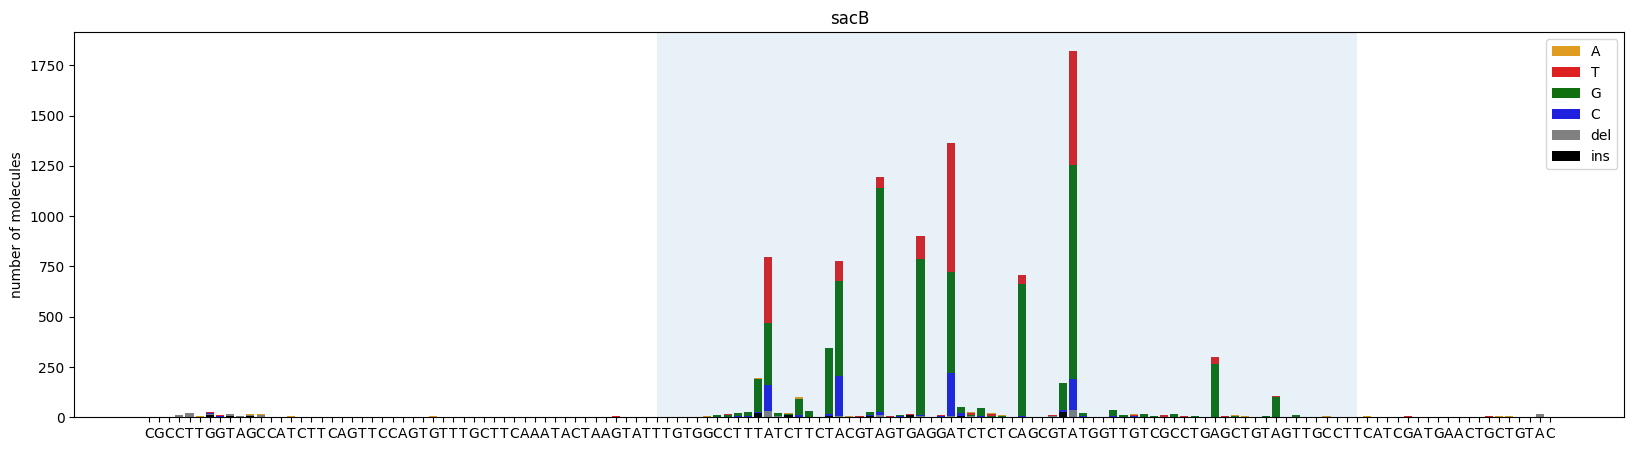

In [ ]:
fig = plot_mutations(gen_list, ref_seq, sample_name="sacB", plot_range=[0,139], TR_range=[50,119])



In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()